In [ ]:
import pandas as pd

MULTILINEARREGRESSION

In [ ]:
df = pd.read_csv("/content/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startup_numeric = df.select_dtypes(include=['int64','float64']) #took only the numerical columns
startup_numeric

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
startup_numeric = startup_numeric.drop(columns = ['R&D Spend'],axis = 1) #axis = 1 means entire column is dropped
 tartup_numeric

,Administration,Marketing Spend,Profit
0,136897.80,471784.10,192261.83
1,151377.59,443898.53,191792.06
2,101145.55,407934.54,191050.39
3,118671.85,383199.62,182901.99
4,91391.77,366168.42,166187.94
5,99814.71,362861.36,156991.12
6,147198.87,127716.82,156122.51
7,145530.06,323876.68,155752.60
8,148718.95,311613.29,152211.77
9,108679.17,304981.62,149759.96


In [ ]:
startup_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Administration   50 non-null     float64
 1   Marketing Spend  50 non-null     float64
 2   Profit           50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [ ]:
#divide the data into input and output

x = startup_numeric.iloc[:,:1].values


y = startup_numeric.iloc[:,1].values

In [ ]:
x

array([[136897.8 ],
       [151377.59],
       [101145.55],
       [118671.85],
       [ 91391.77],
       [ 99814.71],
       [147198.87],
       [145530.06],
       [148718.95],
       [108679.17],
       [110594.11],
       [ 91790.61],
       [127320.38],
       [135495.07],
       [156547.42],
       [122616.84],
       [121597.55],
       [145077.58],
       [114175.79],
       [153514.11],
       [113867.3 ],
       [153773.43],
       [122782.75],
       [105751.03],
       [ 99281.34],
       [139553.16],
       [144135.98],
       [127864.55],
       [182645.56],
       [153032.06],
       [115641.28],
       [152701.92],
       [129219.61],
       [103057.49],
       [157693.92],
       [ 85047.44],
       [127056.21],
       [ 51283.14],
       [ 65947.93],
       [ 82982.09],
       [118546.05],
       [ 84710.77],
       [ 96189.63],
       [127382.3 ],
       [154806.14],
       [124153.04],
       [115816.21],
       [135426.92],
       [ 51743.15],
       [116983.8 ]])

In [ ]:
x.shape

(50, 1)

In [ ]:
y.shape

(50,)

In [ ]:
0.75*205

153.75

In [ ]:
0.25*205

51.25

In [ ]:
# TRAIN TEST SPLIT ON THE INPUTS AND OUTPUTS
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [ ]:
x_train.shape

(37, 1)

In [ ]:
x_test.shape

(13, 1)

In [ ]:
y_train.shape

(37,)

In [ ]:
y_test.shape

(13,)

***PANDAS***

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
# list/numpy array/dictionary/tuple series can be created from any of these

data = [10,20,30,40,50,60,70]
data


[10, 20, 30, 40, 50, 60, 70]

In [ ]:
s1 = pd.Series(data) #creating a series from sequence
s1

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int64

In [ ]:
type(s1)

pandas.core.series.Series

In [ ]:
s2 = pd.Series(['hello1','hello2','hello3'])
s2

0    hello1
1    hello2
2    hello3
dtype: object

In [ ]:
# hello1 - string                          [core python]
# hello1 - unicode character string [<U6]  [numpy]
# hello1 - object                          [pandas]

In [ ]:
# dataframe
df = pd.DataFrame(['hello1','hello2','hello3'])
df

,0
0,hello1
1,hello2
2,hello3


In [ ]:
#create a dataframe of 2 columns from a series

df = {"one": pd.Series([1.0, 2.0, 3.0], index=["A", "B", "C"]),"two": pd.Series([1.0, 2.0, 3.0], index=["A", "B", "C"])}

df = pd.DataFrame(df)
df

,one,two
A,1.0,1.0
B,2.0,2.0
C,3.0,3.0


In [ ]:
# from typing import ValuesView
# # source files to import and use for creating a dataframe

# 1. .txt        - text document
# 2. .html       - hypertext markup language
# 3. .py         - python file
# 4. .ipynb      - interactive python notebook
# 5. .xlsx       - excel spreadsheet
# 6. .csv        - comma separated values
# 7. .tsv        - tab separated Values
# 8. .sql        - structured query language
# 9. .xml        - extensible markup language
# 10..json       - javascript object notation

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# methods to read files
df = pd.read_csv('/content/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.columns

Index(['one', 'two'], dtype='object')

In [ ]:
df.shape #rows,columns

(3, 2)

In [ ]:
df.size #total number of values (rows*columns)

6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     3 non-null      float64
dtypes: float64(2)
memory usage: 72.0+ bytes


In [ ]:
# NaN - Not a Number (null value)
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.head() #prints first 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.head(7) #prints first 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


In [ ]:
df.tail() #prints last 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
df.tail(9)

,R&D Spend,Administration,Marketing Spend,State,Profit
41,27892.92,84710.77,164470.71,Florida,77798.83
42,23640.93,96189.63,148001.11,California,71498.49
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df[0:21] #print first 20 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
df[25:30] #inclusive:exclusive

,R&D Spend,Administration,Marketing Spend,State,Profit
25,64664.71,139553.16,137962.62,California,107404.34
26,75328.87,144135.98,134050.07,Florida,105733.54
27,72107.60,127864.55,353183.81,New York,105008.31
28,66051.52,182645.56,118148.20,Florida,103282.38
29,65605.48,153032.06,107138.38,New York,101004.64


In [ ]:
df.iloc[25:30,0:3]
# purely integer location based indexing for selection by position

,R&D Spend,Administration,Marketing Spend
25,64664.71,139553.16,137962.62
26,75328.87,144135.98,134050.07
27,72107.60,127864.55,353183.81
28,66051.52,182645.56,118148.20
29,65605.48,153032.06,107138.38


In [ ]:
df.iloc[25:30,3:7]

,State,Profit
25,California,107404.34
26,Florida,105733.54
27,New York,105008.31
28,Florida,103282.38
29,New York,101004.64


In [ ]:
df.iloc[:,:] #selects all rows and all columns

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
fname = df.State #create a series for this column
fname

0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object

In [ ]:
fname = df['State'] #create a series for this column
fname

0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object

In [ ]:
df.State.nunique() #count of unique elements in df

3

In [ ]:
fsize = df.groupby('State',sort=False).size()
fsize

State
New York      17
California    17
Florida       16
dtype: int64

In [ ]:
df['State'].value_counts() #number of times each element is repeated

New York      17
California    17
Florida       16
Name: State, dtype: int64

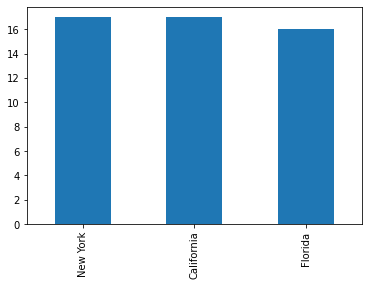

In [ ]:
df['State'].value_counts().plot(kind='bar')
#pandas plotting

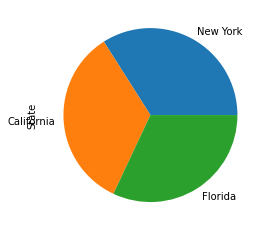

In [ ]:
df['State'].value_counts().plot(kind='pie')
#pandas plotting

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


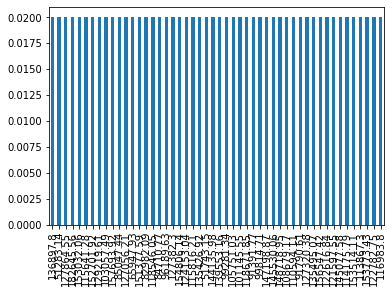

In [ ]:
df['Administration'].value_counts(10).plot(kind='bar')
#pandas plotting

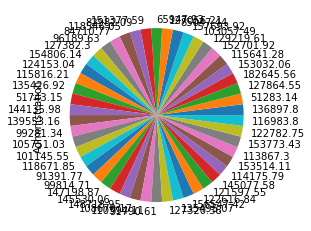

In [ ]:
df['Administration'].value_counts().plot(kind='pie')
#pandas plotting

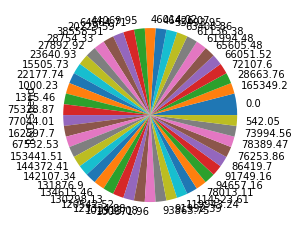

In [ ]:
df['R&D Spend'].value_counts().plot(kind='pie')
#pandas plotting